# Galaxy simulations

Now we'll use some initial conditions from the ```Gadget-2``` particle simulation code to do our own simulations of galaxies!  We'll start with some low resolution data.

There are only 2 types of particles - particle #1 is a star particle and particle #2 is a dark matter particle.

In [1]:
# usual things:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

We'll read data in using np.genfromtxt.  This is the "opposite" function of the np.savetxt we used before to save text files.

Note we can use it to even read from the web!  Or you can download these galaxy snapshots from the Day 5 webpage as well.

In [2]:
# this is a 100 particle (in stars and DM) initial conditions
# each row is a particle
# Ptype is the particle type (dark matter or stars)
# and then x,y,z give coordinates of each particle
# vx,vy,vz give each velocity component
names = ('Ptype', 'x', 'y', 'z', 'vx', 'vy', 'vz')
formats=  ('f8',   'f8', 'f8','f8', 'f8','f8', 'f8')
galaxy_data = np.genfromtxt("https://jnaiman.github.io/csci-p-14110/lesson04/galaxySnaps/snap_001_fac1n3.txt", 
                           delimiter=",", 
                            dtype={'names':names, 
                                   'formats':formats})

Now let's take a quick peak at what the array looks like:

In [3]:
galaxy_data

array([(1., -31.80722427, -9.48369141e+01, -2.66281261e+01,  139.85939026,   33.89159393,   10.28887367),
       (1., -25.45440292,  2.78744245e+00, -6.98595524e+00,  -33.88238907,   96.8704071 ,  -34.19593811),
       (1., -46.64917374, -2.97884789e+01, -1.11127405e+01,  142.41798401,  -73.10621643, -141.17626953),
       (1., -33.41591263, -6.61078491e+01, -6.97367096e+01,   45.44406509,   27.67384529,   55.48738861),
       (1., -80.55812073, -6.63692703e+01, -1.63235512e+01,   44.21417618,  -86.23680115,  -67.03777313),
       (1., -66.03520203, -3.71939774e+01, -1.60895920e+01,   68.70942688,   73.80644226,   -1.33114088),
       (1., -56.10348129, -2.73020420e+01, -9.95618725e+00,  126.39978027,  162.51345825,   26.90430832),
       (1., -58.53800964, -3.71932106e+01, -8.45256042e+00,  206.15211487,   93.15518951,   58.04782486),
       (1., -56.93934631, -3.61453362e+01, -5.43898964e+00,  255.52142334,  121.31546021,   40.11421204),
       (1., -56.50887299, -1.18742981e+01, -1.

We'll convert this data into a form that our hermite solver knows how to use with the `convert_galaxy_data.py` library.  Make sure this is in the same folder as this ipynb notebook!

In [4]:
# convert galaxy data
from convert_galaxy_data import convert_galaxy_data

masses, pos, vel = convert_galaxy_data(galaxy_data)

What do they look like?  Here are the masses (in grams):

In [5]:
masses

array([2.09268e+40, 2.09268e+40, 2.09268e+40, 2.09268e+40, 2.09268e+40,
       2.09268e+40, 2.09268e+40, 2.09268e+40, 2.09268e+40, 2.09268e+40,
       2.09268e+40, 2.09268e+40, 2.09268e+40, 2.09268e+40, 2.09268e+40,
       2.09268e+40, 2.09268e+40, 2.09268e+40, 2.09268e+40, 2.09268e+40,
       2.09268e+40, 2.09268e+40, 2.09268e+40, 2.09268e+40, 2.09268e+40,
       2.09268e+40, 2.09268e+40, 2.09268e+40, 2.09268e+40, 2.09268e+40,
       2.09268e+40, 2.09268e+40, 2.09268e+40, 2.09268e+40, 2.09268e+40,
       2.09268e+40, 2.09268e+40, 2.09268e+40, 2.09268e+40, 2.09268e+40,
       2.09268e+40, 2.09268e+40, 2.09268e+40, 2.09268e+40, 2.09268e+40,
       2.09268e+40, 2.09268e+40, 2.09268e+40, 2.09268e+40, 2.09268e+40,
       4.65040e+39, 4.65040e+39, 4.65040e+39, 4.65040e+39, 4.65040e+39,
       4.65040e+39, 4.65040e+39, 4.65040e+39, 4.65040e+39, 4.65040e+39,
       4.65040e+39, 4.65040e+39, 4.65040e+39, 4.65040e+39, 4.65040e+39,
       4.65040e+39, 4.65040e+39, 4.65040e+39, 4.65040e+39, 4.650

We'll use a slightly different version of the `do_hermite` function: the `do_hermite_galaxies` that is tailored to doing galaxy simulations:

In [11]:
# import the galaxy library
from hermite_library import do_hermite_galaxies

# note: this will likely take a good long while to run
# note that tfinal has changed - this is because our scales are very different!
# time is in seconds and is 10^7 years
r_h, v_h, t_h, e_h = do_hermite_galaxies(masses, pos, vel, tfinal=3.15e7*1e10, Nsteps = 100)

In [13]:
r_h

array([[[-39.76419198, -39.76419198, -39.76419198, ..., -39.76419198,
         -39.76419198, -39.76419198],
        [-98.074704  , -98.074704  , -98.074704  , ..., -98.074704  ,
         -98.074704  , -98.074704  ],
        [-28.52720201, -28.52720201, -28.52720201, ..., -28.52720201,
         -28.52720201, -28.52720201]],

       [[-33.41137063, -33.41137063, -33.41137063, ..., -33.41137063,
         -33.41137063, -33.41137063],
        [ -0.45034749,  -0.45034749,  -0.45034749, ...,  -0.45034749,
          -0.45034749,  -0.45034749],
        [ -8.8850311 ,  -8.8850311 ,  -8.8850311 , ...,  -8.8850311 ,
          -8.8850311 ,  -8.8850311 ]],

       [[-54.60614144, -54.60614144, -54.60614144, ..., -54.60614144,
         -54.60614144, -54.60614144],
        [-33.02626879, -33.02626879, -33.02626879, ..., -33.02626879,
         -33.02626879, -33.02626879],
        [-13.01181638, -13.01181638, -13.01181638, ..., -13.01181639,
         -13.01181639, -13.01181639]],

       ...,

       [[

Finally, plot!

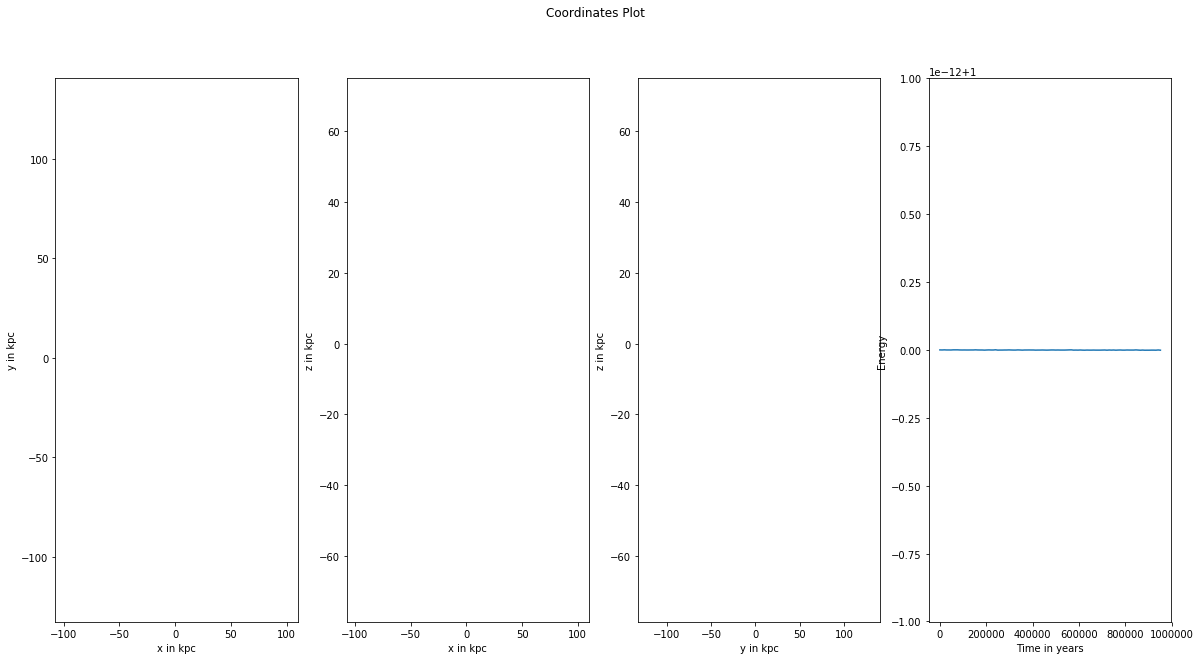

In [12]:
# let's plot in multi-d
fig, ax = plt.subplots(1, 4, figsize = (10*2, 10))
fig.suptitle('Coordinates Plot')

# for plots 0->2
ax[0].set_xlabel('x in kpc')
ax[0].set_ylabel('y in kpc')

ax[1].set_xlabel('x in kpc')
ax[1].set_ylabel('z in kpc')

ax[2].set_xlabel('y in kpc')
ax[2].set_ylabel('z in kpc')

# plot Euler's solution, particle 1, x-y
for i in range(len(masses)):
    ax[0].plot(r_h[i,0,:], r_h[i,1,:], lw=3)

for i in range(len(masses)):
    ax[1].plot(r_h[i,0,:], r_h[i,2,:], lw=3)

for i in range(len(masses)):
    ax[2].plot(r_h[i,1,:], r_h[i,2,:], lw=3)
    
    
ax[3].set_xlabel('Time in years')
ax[3].set_ylabel('Energy')
# re-norm energy
ax[3].plot(t_h, e_h)

plt.show()

### Exercise
Calculate the merger of these two objects and plot the particle trajectories.  To do this, you'll need many more timesteps and a larger tfinal.

Note that you might want to color each type of particle a different way instead of having matplotlib choose colors for you - how do you think you can go about doing that?

Bonus: try higher resolutions - how much longer does it take?  How to quantify this? (hint: google "time library python")

Bonus bonus: how would you go about making an animation of this?